# Modulo 3: Ejercicio de evaluación final

### 🧹FASE 1: Exploración y Limpieza🧹

In [1]:
import pandas as pd
import numpy as np
import random
import emoji

In [2]:
df_flights = pd.read_csv("Customer Flight Activity.csv")
df_loyalty = pd.read_csv("Customer Loyalty History.csv")

In [3]:
df_loyalty.tail()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
16732,823768,Canada,British Columbia,Vancouver,V6E 3Z3,Female,College,NaN,Married,Star,61850.19,Standard,2012,12,NaN,NaN
16733,680886,Canada,Saskatchewan,Regina,S1J 3C5,Female,Bachelor,89210.0,Married,Star,67907.27,Standard,2014,9,NaN,NaN
16734,776187,Canada,British Columbia,Vancouver,V5R 1W3,Male,College,NaN,Single,Star,74228.52,Standard,2014,3,NaN,NaN
16735,906428,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,-57297.0,Married,Star,10018.66,2018 Promotion,2018,4,NaN,NaN
16736,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0


In [4]:
df_flights.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [5]:
df_airline = df_loyalty.merge(df_flights, on="Loyalty Number", how="outer")

In [6]:
df_airline.sample()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
308852,782284,Canada,Quebec,Montreal,H2T 2J6,Male,Bachelor,76790.0,Married,Aurora,...,NaN,2018,10,0,0,0,0,0.0,0,0


In [7]:
df_airline.shape

(405624, 25)

In [8]:
df_airline.info()
#Hay tipos de datos que hay que cambiar, como en las columnas de Cancellation Year & Cancellation Month.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollment Year              405624 non-null  int64  
 13 

In [9]:
# Verifico que no haya datos mal escritos o que contengan errores

df_airline['Education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [10]:
df_airline['Marital Status'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

**manejo de duplicados**

In [11]:
df_airline["Loyalty Number"].value_counts()

Loyalty Number
678205    72
467894    48
684881    48
208241    48
126490    48
          ..
403361    24
403463    24
403473    24
403500    24
999986    24
Name: count, Length: 16737, dtype: int64

In [12]:
df_airline[df_airline['Loyalty Number'] == 678205]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,...,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
260688,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,1,0,0,0,0,0.0,0,0
260689,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,1,0,0,0,0,0.0,0,0
260690,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,1,0,0,0,0,0.0,0,0
260691,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,2,0,0,0,0,0.0,0,0
260692,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2017,2,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260755,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2018,11,11,0,11,1177,117.0,0,0
260756,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2018,11,8,1,9,1341,134.0,0,0
260757,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2018,12,0,0,0,0,0.0,0,0
260758,678205,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,67358.0,Married,Nova,...,NaN,2018,12,0,0,0,0,0.0,0,0


In [13]:
df_airline = df_airline.drop_duplicates() #borramos los datos que sean identicos

In [14]:
df_airline.duplicated().sum()

0

**Vamos a tratar los nulos**

In [15]:
#Analizamos en que columnas se concentra la falta de datos
df_airline.isnull().sum()

Loyalty Number                      0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102260
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              354110
Cancellation Month             354110
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
dtype: int64

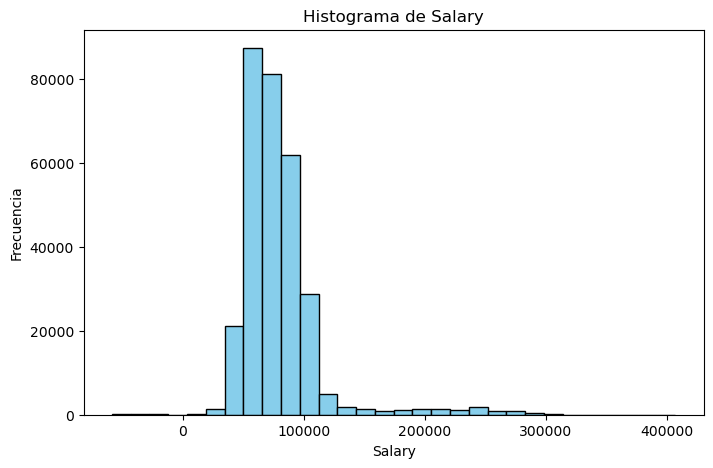

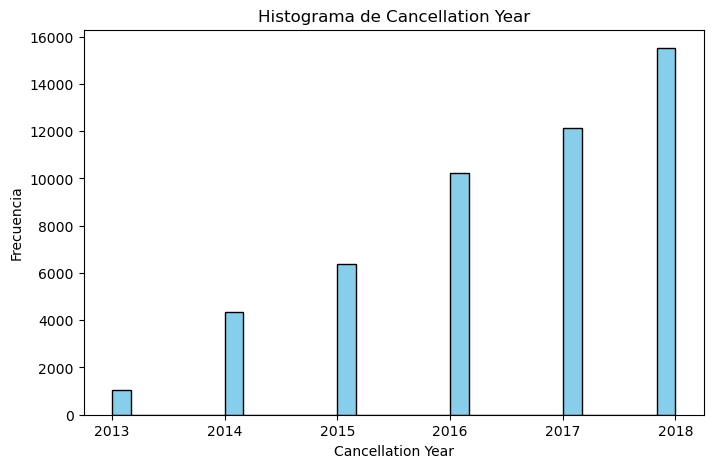

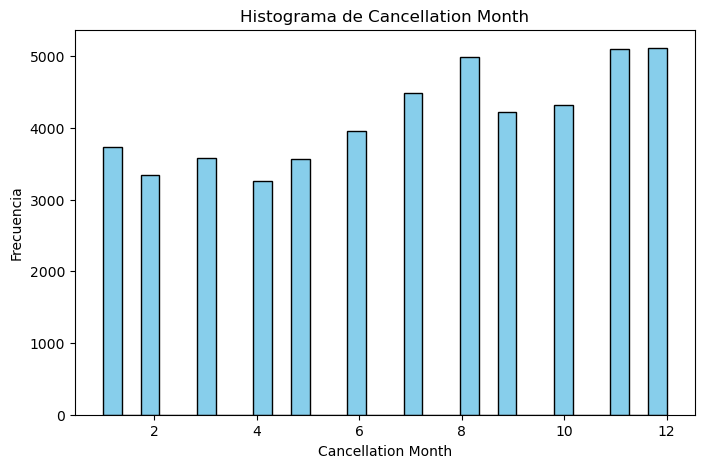

In [16]:
import matplotlib.pyplot as plt
#Quiero ver la distribución de nulos, para ver si tienen una distribución normal:
null_numeric_columns = df_airline[df_airline.columns[df_airline.isnull().any()]].select_dtypes(include = "number").columns

for col in list(null_numeric_columns): # si detecta un nulo, hace un histograma
    plt.figure(figsize=(8, 5))
    plt.hist(df_airline[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [17]:
#Vamos a ver % de Nulos en las columnas
for col in null_numeric_columns:
    print(f"La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna", col)
    display(df_airline[col].value_counts(dropna=False, normalize=True) * 100) 
    print("........................")

La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna Salary


Salary
 NaN         25.326927
 101933.0     0.136715
 62283.0      0.083218
 51573.0      0.083218
 61809.0      0.083218
               ...    
-31911.0      0.005944
 64630.0      0.005944
 77950.0      0.005944
 85525.0      0.005944
 46594.0      0.005944
Name: proportion, Length: 5891, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna Cancellation Year


Cancellation Year
NaN       87.703091
2018.0     3.843620
2017.0     3.008470
2016.0     2.538141
2015.0     1.575193
2014.0     1.075887
2013.0     0.255597
Name: proportion, dtype: float64

........................
La distribución de las categorías (incluyendo nulos 🏴󠁴󠁨󠀵󠀵󠁿) para la columna Cancellation Month


Cancellation Month
NaN     87.703091
12.0     1.266099
11.0     1.261888
8.0      1.236378
7.0      1.109570
10.0     1.070438
9.0      1.046166
6.0      0.980781
1.0      0.923073
3.0      0.886418
5.0      0.881464
2.0      0.826233
4.0      0.808401
Name: proportion, dtype: float64

........................


    ✍🏼Conclusión: En las 3 columnas tenemos un alto porcentaje de nulos (más de un 15% en cada columna)

Hemos preguntado a la compañía aerea por la importancia de estas 3 columnas y nos dicen que:

💰 **Salary:** Es un dato imprescindible, vamos a necesitar usar tecnicas más avanzadas para tratar los nulos.

📅 **Cancellation Year & Month:** Estos clientes siguen activos, llenaremos con "Current" & "Ongoing"

In [18]:
df_airline['Cancellation Month'] = df_airline['Cancellation Month'].fillna('Ongoing')

In [19]:
df_airline['Cancellation Year'] = df_airline['Cancellation Year'].fillna('Current')

In [20]:
#Quiero ver en que nivel educativo tenemos más nulos

salary_education = df_airline.groupby("Education")["Salary"].mean().reset_index()
salary_education.rename(columns={"Salary": "Average Salary"}, inplace=True)
print(salary_education)

              Education  Average Salary
0              Bachelor    72473.471154
1               College             NaN
2                Doctor   178403.675202
3  High School or Below    61019.926143
4                Master   103734.523724


In [21]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer 
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [22]:
#Inferimos los nulos para intentar sacar los datos que nos faltan porque vamos a necesitar esta columna

imputer_iter = IterativeImputer(max_iter = 100, random_state = 42)
df_airline['Salary'] = imputer_iter.fit_transform(df_airline[['Salary']])

In [23]:
df_airline.isnull().sum()

Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Salary                         0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [24]:
#Cambiamos el tipo de dato ahora que no tenemos nulos ni duplicados

df_airline['Enrollment Year']=df_airline['Enrollment Year'].astype(int)
df_airline['Enrollment Month']=df_airline['Enrollment Month'].astype(int)

In [25]:
#Convierto a tipo category las siguientes columnas: gender, marital status y education
#lo hago porque trabajaremos mejor asi luego si tenemos que usar groupby(), value_counts() y ad+ mantiene los valores originales

categorical_cols = ["Gender", "Marital Status", "Education"]
df_airline[categorical_cols] = df_airline[categorical_cols].astype("category")

In [26]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403760 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Loyalty Number               403760 non-null  int64   
 1   Country                      403760 non-null  object  
 2   Province                     403760 non-null  object  
 3   City                         403760 non-null  object  
 4   Postal Code                  403760 non-null  object  
 5   Gender                       403760 non-null  category
 6   Education                    403760 non-null  category
 7   Salary                       403760 non-null  float64 
 8   Marital Status               403760 non-null  category
 9   Loyalty Card                 403760 non-null  object  
 10  CLV                          403760 non-null  float64 
 11  Enrollment Type              403760 non-null  object  
 12  Enrollment Year              403760 non-null  int

In [27]:
#ya tenemos los duplicados y nulos limpios 🧼 y además el tipo de dato como nos interesa 🎉

In [ ]:
df_airline.to_csv("df_airline.csv", index=False) # Aqui se descarga el CSV

### 📊 FASE 2: Visualización 📊

In [29]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

**1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante cada año?**

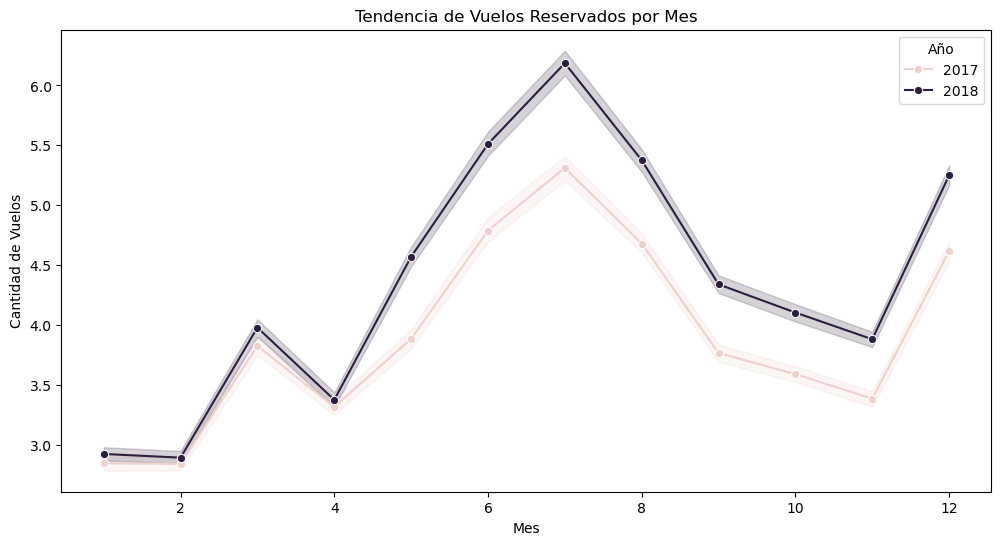

In [30]:
# Para el analisis de variables numéricas con Bivariable lo mejor sería usar un gráfico de calor,línea o dispersión (scatter plot)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_airline, x="Month", y="Flights Booked", hue="Year", marker="o")
plt.title("Tendencia de Vuelos Reservados por Mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de Vuelos")
plt.legend(title="Año")
plt.show()


✍🏼 Tienen una distribución muy parecida durante el primer trimestre del año y se observa un aumento de la actividad en ambos años durante el segundo y tercer trimestre, meses de primavera-verano. Durante el último trimestre del año amos experimentan una bajada progresiva de la actividad y un pico exponencial hacia final de año muy seguramente causado por las fiestas navideñas. Es destacable que se observa mayor actividad en el año 2018 con respecto a 2017.

**2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?**

Text(0.5, 1.0, 'Relación entre distancia de vuelos y puntos acumulados por cliente')

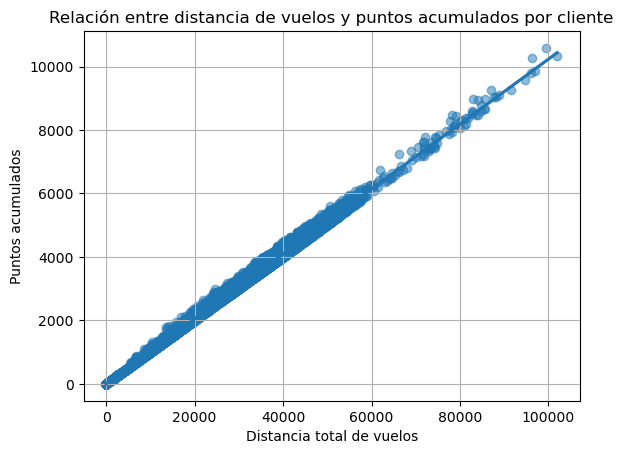

In [31]:
customer_data = df_airline.groupby("Loyalty Number")[["Distance", "Points Accumulated"]].sum().reset_index()

sns.regplot(x="Distance", y="Points Accumulated", data=customer_data, scatter_kws={"alpha":0.5})
plt.xlabel("Distancia total de vuelos")
plt.ylabel("Puntos acumulados")
plt.grid(True) 
plt.title("Relación entre distancia de vuelos y puntos acumulados por cliente")


Text(0.5, 1.0, 'Relación entre distancia de vuelos y puntos acumulados por cliente')

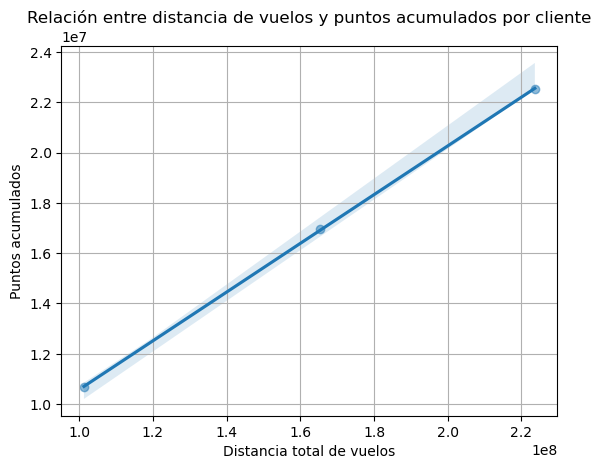

In [32]:
#de esta forma nose si son valores unicos :(
customer_distance_data = df_airline.groupby("Loyalty Card")[["Distance", "Points Accumulated"]].sum().reset_index()

sns.regplot(x="Distance", y="Points Accumulated", data=customer_distance_data, scatter_kws={"alpha":0.5})
plt.xlabel("Distancia total de vuelos")
plt.ylabel("Puntos acumulados")
plt.grid(True) 
plt.title("Relación entre distancia de vuelos y puntos acumulados por cliente")

✍🏼 Existe una clara relación entre la distancia recorrida en los vuelos y el número de puntos acumulados.
Esta relación, además, parece ser de tendencia positiva, pues cuando una de ambas variables aumenta, la otra también.




**3. ¿Cuál es la distribución de los clientes por provincia o estado? Es decir, poder ver cuántos clientes hay en cada
provincia.**

In [34]:
province_unique = df_airline.groupby('Province')['Loyalty Number'].nunique().sort_values(ascending=False).reset_index()
province_unique

,Province,Loyalty Number
0,Ontario,5404
1,British Columbia,4409
2,Quebec,3300
3,Alberta,969
4,Manitoba,658
5,New Brunswick,636
6,Nova Scotia,518
7,Saskatchewan,409
8,Newfoundland,258
9,Yukon,110


C:\Users\crist\AppData\Local\Temp\ipykernel_42900\3203134550.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Province", y= "Loyalty Number", data=province_unique, legend=False, palette='Pastel2')


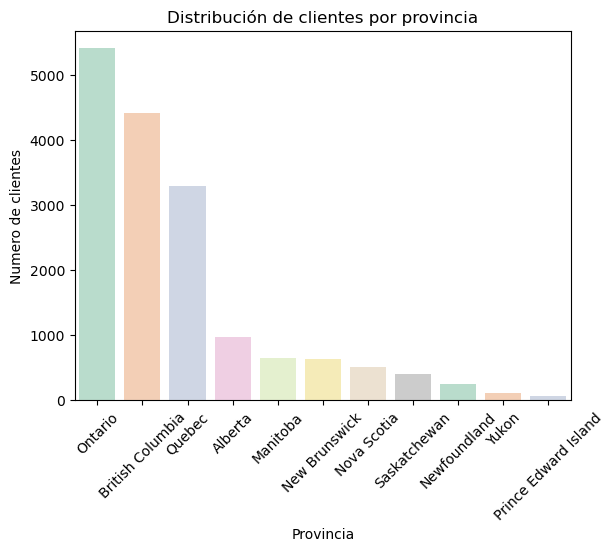

In [35]:
sns.barplot(x="Province", y= "Loyalty Number", data=province_unique, legend=False, palette='Pastel2')

plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Numero de clientes')
plt.xticks(rotation=45)
plt.show()

✍🏼  No existe una representación uniforme de las provincias, sino que se aprecia que la gran mayoría de clientes pertenece a Ontario, 
seguidos por British Columnia. Por contra, Yukon y Prince Edward Island tiene la menor representación


**4. Compara el salario promedio por nivel educativo**

C:\Users\crist\AppData\Local\Temp\ipykernel_42900\4254447729.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_salary = df_airline.groupby("Education")["Salary"].mean().reset_index()
C:\Users\crist\AppData\Local\Temp\ipykernel_42900\4254447729.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="Education", x="Salary", data=education_salary, palette="plasma")


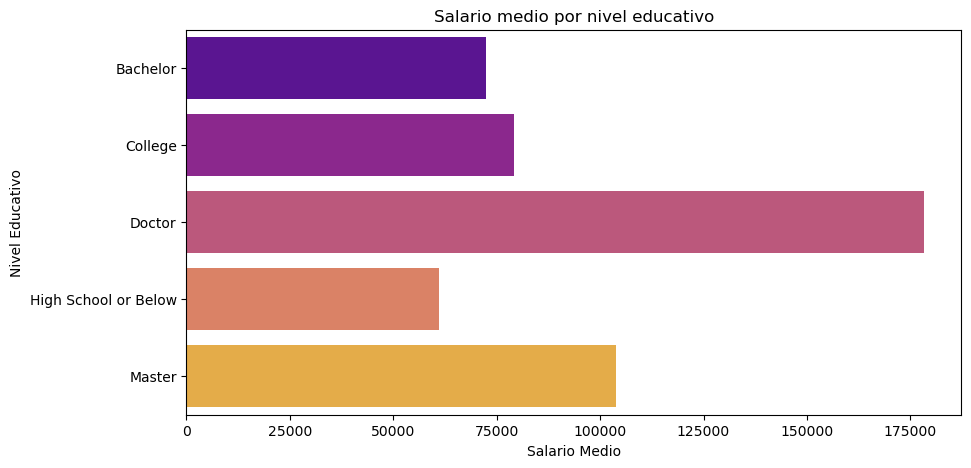

In [36]:
df_airline["Education"].unique()

#Agrupamos por nivel educativo y sueldo medio
education_salary = df_airline.groupby("Education")["Salary"].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(y="Education", x="Salary", data=education_salary, palette="plasma")
plt.xlabel("Salario Medio")
plt.ylabel("Nivel Educativo")
plt.title("Salario medio por nivel educativo")

plt.show()

✍🏼 Esta informacion debería interpretarse teniendo en cuenta que un 25,32% de los datos dentro de Salary fueron nulos y los rellenamos con tecnicas avanzadas de imputación.
Teniendo esto en cuenta, podemos apreciar una correlación positiva entre el nivel educativo y la media de los salarios, 
ya que, a medida que el nivel educativo incrementa, los salarios suelen verse incrementados 📈
 
Cabe destacar además que hay un gran salto de los salarios medios desde Master a Doctor.


**5. ¿Cuál es el porcentaje de clientes por cada tipo de tarjeta de fidelidad?**

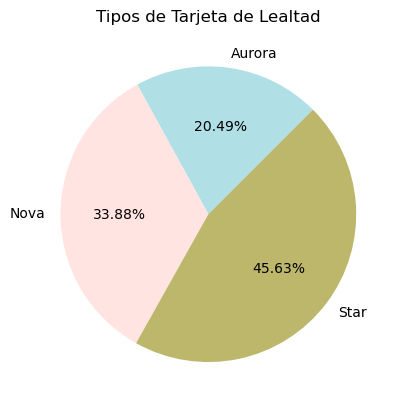

In [37]:
card_distribution = df_airline.groupby('Loyalty Card')['Loyalty Number'].nunique()

plt.pie(x=card_distribution.values, 
        labels=card_distribution.index,  
        autopct='%1.2f%%', #cada segmento con dos decimales
        startangle=45,
        colors=['#B0E0E6', '#FFE4E1', '#BDB76B']) 
plt.title("Tipos de Tarjeta de Lealtad", fontsize=12)
plt.show()

✍🏼 La mayoría de los clientes se mueven entre las tarjetas de fidelización **Star**⭐ y **Nova**🪐 (45,63% y 33,88% respectivamente), siendo **Aurora**🌌 la menos representada (20,6%)

**6. ¿Cómo se distribuyen los clientes según su estado civil y género? Es decir, una gráfica donde vea a mis clientes
separados por la categoría de estado civil y que en cada categoría vea cuáles son hombres y cuales mujeres**

C:\Users\crist\AppData\Local\Temp\ipykernel_42900\3279398008.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  marital_gender_distribution = df_airline.groupby(['Marital Status', 'Gender'])['Loyalty Number'].nunique().reset_index()


Text(0.5, 0, 'estado civil')

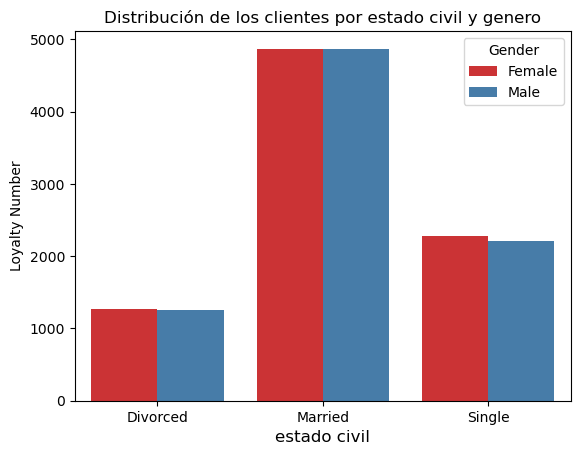

In [38]:
marital_gender_distribution = df_airline.groupby(['Marital Status', 'Gender'])['Loyalty Number'].nunique().reset_index()

sns.barplot(x='Marital Status', y="Loyalty Number", hue='Gender', data=marital_gender_distribution, palette='Set1')
plt.title('Distribución de los clientes por estado civil y genero', fontsize=12)
plt.xlabel('estado civil', fontsize=12)

✍🏼 No existe una diferencia clara entre ambos géneros en lo que a estado civil respecta. Lo que sí se observa es que la mayoría de los clientes, tanto hombres como mujeres, están casados.

### 🔥 **BONUS** Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo 🔥


**Se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los**
**clientes. Para ello, los pasos que deberás seguir son:**
   1.  **Preparación de Datos:** Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights
Booked' y 'Education'.
   2.  **Análisis Descriptivo:** Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el
promedio, la desviación estándar) del número de vuelos reservados para cada grupo.
   3.  **Prueba Estadística:** Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el
número de vuelos reservados entre los diferentes niveles educativos. Como son varios grupos, puedes ir
comparándolos de dos en dos.

**Preparacion de datos**

In [39]:
#Primero filtramos el conjunto de datos para incluir solo las columnas relevantes 'Vuelos reservados' y 'Educación':

filtered_dataset = df_airline[['Education', 'Flights Booked']]
filtered_dataset.sample(10)

,Education,Flights Booked
355953,Bachelor,4
36126,College,0
154345,Bachelor,0
351412,Bachelor,2
399330,College,12
380172,Bachelor,7
249733,Bachelor,7
95468,Bachelor,6
262495,College,0
344832,College,2


**Analisis Descriptivo**

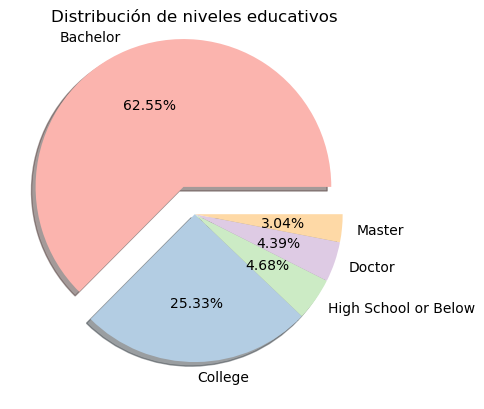

In [40]:
# Antes quiero ver como está la distribución entre los niveles educativos, para tener en cuenta el tamaño de la muestra
education_stats = filtered_dataset['Education'].value_counts()

y = education_stats
mylabels = ['Education']
myexplode = [0.2, 0, 0, 0, 0]
colors = plt.cm.cubehelix(range(len(education_stats)))

plt.pie(education_stats, labels=education_stats.index,autopct='%1.2f%%', explode = myexplode, shadow = True, colors=plt.cm.Pastel1.colors) 
plt.title("Distribución de niveles educativos", fontsize=12)
plt.show()

In [41]:
# Agrupamos los datos según el nivel educativo y calculamos estadísticas descriptivas básicas

In [42]:
stats_by_education = filtered_dataset.groupby ('Education')['Flights Booked'].agg(['mean', 'median', 'std'])
stats_by_education

C:\Users\crist\AppData\Local\Temp\ipykernel_42900\4211958192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_by_education = filtered_dataset.groupby ('Education')['Flights Booked'].agg(['mean', 'median', 'std'])


,mean,median,std
Education,,,
Bachelor,4.110288,1.0,5.221671
College,4.169744,1.0,5.246040
Doctor,4.175512,1.0,5.256971
High School or Below,4.176209,1.0,5.239267
Master,4.200700,1.0,5.213956


In [43]:
filtered_dataset.groupby ('Education')['Flights Booked'].describe().T 

C:\Users\crist\AppData\Local\Temp\ipykernel_42900\2922316451.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_dataset.groupby ('Education')['Flights Booked'].describe().T


Education,Bachelor,College,Doctor,High School or Below,Master
count,252567.000000,102260.000000,17731.000000,18915.000000,12287.000000
mean,4.110288,4.169744,4.175512,4.176209,4.200700
std,5.221671,5.246040,5.256971,5.239267,5.213956
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000
max,21.000000,21.000000,21.000000,21.000000,21.000000


    Conclusiones del análisis descriptivo:

✈️ Los diferentes niveles educativos tienen una cantidad similar de vuelos reservados, con una media cercana a 4 y una mediana de 1, wich means, that some people book very few flights, while others book a lot.

🎓La desviación estándar es casi idéntica en todos los grupos 5.2 aprox, lo que indica que la variabilidad en las reservas es similar independientemente del nivel educativo.

📉 Los percentiles muestran que la mayoría de los clientes reservan entre 1 y 8 vuelos y el hecho de que el máximo de reservas sea exactamente 21 en todos los niveles educativos podría llevar a pensar en un posible límite o un sesgo en la recopilación de datos, por lo que estaría bien revisar el método de obtención de datos por si acaso.

🔍 Para futuros análisis, sería interesante segmentar a los viajeros frecuentes y analizar cómo impactan en los resultados generales de la empresa.

**Prueba de Estadistica**

In [44]:
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

In [45]:
# Defino los grupos
Grupo1 = filtered_dataset[filtered_dataset["Education"] == "High School or Below"]["Flights Booked"].values
Grupo2 = filtered_dataset[filtered_dataset["Education"] == "College"]["Flights Booked"].values
Grupo3 = filtered_dataset[filtered_dataset["Education"] == "Bachelor"]["Flights Booked"].values
Grupo4 = filtered_dataset[filtered_dataset["Education"] == "Master"]["Flights Booked"].values
Grupo5 = filtered_dataset[filtered_dataset["Education"] == "Doctor"]["Flights Booked"].values

In [46]:
def prueba_hipotesis(*args):
    """
    Realiza una prueba de hipótesis para comparar grupos.
    1. Primero verifica si los datos son normales usando el test de Shapiro-Wilk o Kolmogorov-Smirnov.
    2. Si los datos son normales, usa Bartlett para probar igualdad de varianzas. Si no son normales, usa Levene.
    3. Si las varianzas son iguales, usa el t-test de Student; si no, usa la versión de Welch.
    4. Si los datos no son normales, usa el test de Mann-Whitney

    Parámetros:
    *args: listas o arrays con los datos de cada grupo. Espera DOS grupos a comparar

    Retorna:
    dict con resultados del test de normalidad, varianza e hipótesis.
    """
    
    # Verificar si hay al menos dos grupos
    if len(args) < 2:
        raise ValueError("Se necesitan al menos dos conjuntos de datos para realizar la prueba.")
    
    # Comprobar normalidad en cada grupo
    normalidad = []
    for grupo in args:
        if len(grupo) > 50:
            p_valor_norm = stats.kstest(grupo, 'norm').pvalue  # Kolmogorov-Smirnov si n > 50
        else:
            p_valor_norm = stats.shapiro(grupo).pvalue  # Shapiro-Wilk si n <= 50
        normalidad.append(p_valor_norm > 0.05)

    datos_normales = all(normalidad)  # True si todos los grupos son normales

    # Prueba de igualdad de varianzas
    if datos_normales:
        p_valor_varianza = stats.bartlett(*args).pvalue  # Test de Bartlett si los datos son normales
    else:
        p_valor_varianza = stats.levene(*args, center="median").pvalue  # Test de Levene si no son normales

    varianzas_iguales = p_valor_varianza > 0.05

    # Aplicar el test adecuado
    if datos_normales:
        if varianzas_iguales:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=True)
            test_usado = "t-test de Student (varianzas iguales)"
        else:
            t_stat, p_valor = stats.ttest_ind(*args, equal_var=False)
            test_usado = "t-test de Welch (varianzas desiguales)"
    else:
        t_stat, p_valor = stats.mannwhitneyu(*args)
        test_usado = "Mann-Whitney U"

    # Nivel de significancia
    alfa = 0.05

    # Resultados
    resultado = {
        "Test de Normalidad": normalidad,
        "Datos Normales": datos_normales,
        "p-valor Varianza": p_valor_varianza,
        "Varianzas Iguales": varianzas_iguales,
        "Test Usado": test_usado,
        "Estadístico": t_stat,
        "p-valor": p_valor,
        "Conclusión": "Rechazamos H0. Es decir, sí hay diferencias significativas)" if p_valor < alfa else "No se rechaza H0. Es decir, no hay diferencias significativas)"
    }

    # Imprimir resultados de manera más clara
    print("\n📊 **Resultados de la Prueba de Hipótesis** 📊")
    print(f"✅ Test de Normalidad: {'Sí' if datos_normales else 'No'}")
    print(f"   - Normalidad por grupo: {normalidad}")
    print(f"✅ Test de Varianza: {'Iguales' if varianzas_iguales else 'Desiguales'} (p = {p_valor_varianza:.4f})")
    print(f"✅ Test aplicado: {test_usado}")
    print(f"📉 Estadístico: {t_stat:.4f}, p-valor: {p_valor:.4f}")
    print(f"🔍 Conclusión: {resultado['Conclusión']}\n")

In [47]:
#Vamos a ir comparando cada par de grupos

In [48]:
prueba_hipotesis(Grupo1, Grupo2)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.9502)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 969453228.5000, p-valor: 0.5757
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



In [49]:
prueba_hipotesis(Grupo2, Grupo3)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Desiguales (p = 0.0027)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 12993040557.5000, p-valor: 0.0023
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [50]:
prueba_hipotesis(Grupo3, Grupo4)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.1183)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 1532540228.0000, p-valor: 0.0141
🔍 Conclusión: Rechazamos H0. Es decir, sí hay diferencias significativas)



In [51]:
prueba_hipotesis(Grupo4, Grupo5)


📊 **Resultados de la Prueba de Hipótesis** 📊
✅ Test de Normalidad: No
   - Normalidad por grupo: [False, False]
✅ Test de Varianza: Iguales (p = 0.8104)
✅ Test aplicado: Mann-Whitney U
📉 Estadístico: 109499288.0000, p-valor: 0.4139
🔍 Conclusión: No se rechaza H0. Es decir, no hay diferencias significativas)



👩🏼‍🏫 **Conclusiones finales**

Hemos establecido unos grupos de datos teniendo en cuenta el orden del nivel educativo de menor a mayor

1️⃣ High School or Below - **Grupo 1**

2️⃣ College - **Grupo 2**

3️⃣ Bachelor - **Grupo 3**

4️⃣ Master - **Grupo 4**

5️⃣ Doctor - **Grupo 5**

Hemos realizado comparaciones por pares de datos entre los cinco grupos de cada nivel educativo para poder observar un poco más en detalle la relación de estos niveles con la cantidad de vuelos reservados.
En líneas generales, para la mayoría de las comparaciones no se aprecian diferencias estadísticamente significativas en ningún par de grupos, a excepción del Grupo 3 (Bachelor), donde se encontraron diferencias significativas al compararlo con el Grupo 2 (College) y el Grupo 4 (Master).

Por lo que, si hablamos de relacionar habitos de compra/ reserva de vuelos con nivel educativo, las personas con un título de Bachelor presentan un comportamiento diferente en la reserva de vuelos en comparación con quienes tienen un nivel educativo menor (College) o mayor (Master). Sin embargo, dejando de lado esta comparativa en específico, no se encontraron diferencias significativas entre los demás niveles educativos.

Como conslusión general, el nivel educativo, no parece ser un factor definitorio del comportamiento de reserva de vuelos. Quizá en futuros análisis sería interesante relacionar la cantidad de veulos reservados con otras variables demográficas o socioeconómicas, como genero, estado civil u otros factores que nos pueden dar más información y directrices a la hora de dirigirnos a un grupo específico de mercado a la hora de diseñar estrategias de marketing, promociones u ofertas dirigidas a segmentos concretos de la población.